<a href="https://colab.research.google.com/github/cbsobral/ml-fies/blob/main/Drive_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset

In [38]:
import pandas as pd

url_a = 'https://drive.google.com/file/d/1prPbFSiXFTHmTHzXTGxy4HrtRxXUHhce/view?usp=sharing'
path_a = 'https://drive.google.com/uc?export=download&id='+url_a.split('/')[-2]
base_df_a = pd.read_excel(path_a)
base_df_a.shape

(309999, 37)

In [39]:
url_b = 'https://drive.google.com/file/d/1nGckSszPPifPvR3o5FeYaKArUYbfjHGn/view?usp=sharing'
path_b = 'https://drive.google.com/uc?export=download&id='+url_b.split('/')[-2]
base_df_b = pd.read_excel(path_b)
base_df_b.shape

(327823, 37)

In [40]:
base_df = base_df_a.append(base_df_b)
base_df.shape

(637822, 37)

In [41]:
base_df.head()

,NU_ANO_SEMESTRE_INSCRICAO,SG_SEXO,DS_OCUPACAO,DS_ESTADO_CIVIL,VL_RENDA_FAMILIAR_BRUTA_MENSAL,VL_RENDA_PESSOAL_BRUTA_MENSAL,NO_MUNICIPIO,SG_UF,DS_RACA_COR,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,NU_ANO_CONCLUSAO_ENSINO_MEDIO,NU_SEMESTRE_REFERENCIA,SG_UF_CURSO,NO_CURSO,VL_AVALIACAO_IGC,VL_FAIXA_CPC,VL_FAIXA_CC,QT_SEMESTRES_CURSO,QT_SEMESTRE_CONCLUIDO,QT_SEMESTRE_FINANCIAMENTO,QT_MESES_FINANC_SEMESTRE_ATUAL,QT_MEMBRO,VL_RENDA_PER_CAPITA,VL_SEMESTRE_SEM_DESCONTO,VL_SEMESTRE_COM_DESCONTO,VL_SEMESTRE_ATUAL,NU_PERCENTUAL_COMPROMETIMENTO,NU_PERCENT_SOLICITADO_FINANC,VL_FINANCIADO_SEMESTRE,VL_FINANC_RECURSO_ALUNO,VL_TOTAL_FINANCIAMENTO,VL_LIMITE_GLOBAL,dt_inicio_cont,fase_contrato,nu_dias_atraso,vl_divida,ANO_NASC
0,12014,F,Vendedor e prestador de serviÃ§os do comÃ©rcio...,Solteiro,728.74,728.74,NaN,NaN,P,S,10.0,12015,AL,PEDAGOGIA,3.0,NaN,NaN,8,2,8,6,2.0,364.37,2276.10,1683.18,1683.18,71.95,100,1683.18,0.0,13465.44,15730.80,2014-05-02,Amortizacao,0,14549.68,1991
1,12013,F,Outros trabalhadores de serviÃ§os diversos,Solteiro,553.35,553.35,NaN,NaN,P,S,7.0,12015,MG,LETRAS - INGLÊS,3.0,2.0,3.0,6,4,6,6,1.0,553.35,2790.00,2650.50,2650.50,67.47,100,2650.50,0.0,15903.00,16800.75,2013-02-13,Amortizacao,0,12139.80,1990
2,22014,F,Estudante,Solteiro,5962.49,0.00,NaN,NaN,P,N,13.0,12015,MG,MEDICINA,3.0,3.0,4.0,12,1,12,6,5.0,1192.50,28284.00,26810.85,26810.85,352.14,100,26810.85,0.0,321730.20,377937.00,2014-08-12,Utilizacao,0,397349.62,1996
3,12012,F,Estudante,Solteiro,21671.74,0.00,NaN,NaN,B,N,8.0,12015,MG,MEDICINA,3.0,3.0,4.0,12,6,12,6,4.0,5417.94,34112.05,32065.32,32065.32,75.51,100,32065.32,0.0,384783.84,368181.00,2012-03-20,Utilizacao,0,434901.80,1991
4,22011,F,Estudante,Solteiro,1000.00,0.00,NaN,NaN,B,S,9.0,12015,RN,PSICOLOGIA,3.0,4.0,4.0,10,7,10,6,3.0,333.33,5759.76,5190.00,5190.00,204.90,100,2595.00,2595.0,51900.00,25612.50,2011-09-23,Amortizacao,682,27518.91,1992


In [42]:
base_df.dtypes

NU_ANO_SEMESTRE_INSCRICAO                  int64
SG_SEXO                                   object
DS_OCUPACAO                               object
DS_ESTADO_CIVIL                           object
VL_RENDA_FAMILIAR_BRUTA_MENSAL           float64
VL_RENDA_PESSOAL_BRUTA_MENSAL            float64
NO_MUNICIPIO                              object
SG_UF                                     object
DS_RACA_COR                               object
ST_ENSINO_MEDIO_ESCOLA_PUBLICA            object
NU_ANO_CONCLUSAO_ENSINO_MEDIO            float64
NU_SEMESTRE_REFERENCIA                     int64
SG_UF_CURSO                               object
NO_CURSO                                  object
VL_AVALIACAO_IGC                         float64
VL_FAIXA_CPC                             float64
VL_FAIXA_CC                              float64
QT_SEMESTRES_CURSO                         int64
QT_SEMESTRE_CONCLUIDO                      int64
QT_SEMESTRE_FINANCIAMENTO                  int64
QT_MESES_FINANC_SEME

# Feature Analysis

## Carol 

SG_SEXO
DS_ESTADO_CIVIL
VL_RENDA_PESSOAL_BRUTA_MENSAL
SG_UF
ST_ENSINO_MEDIO_ESCOLA_PUBLICA
NU_SEMESTRE_REFERENCIA
NO_CURSO
QT_SEMESTRE_CONCLUIDO
VL_SEMESTRE_SEM_DESCONTO
VL_SEMESTRE_ATUAL
VL_FINANCIADO_SEMESTRE
fase_contrato
vl_divida

### SG_SEXO
gender =  male, female
NAs = 6 --> remove 

In [52]:
base_df['SG_SEXO'].value_counts()

F    381211
M    256605
Name: SG_SEXO, dtype: int64

In [53]:
sum(pd.isnull(base_df['SG_SEXO']))

6

### DS_ESTADO_CIVIL
marital_status =  single, married, divorced, civil union, separated, widowed
NAs = 75 --> remove 

In [54]:
base_df['DS_ESTADO_CIVIL'].value_counts()

Solteiro           490754
Casado             103754
Divorciado          18549
UniÃ£o estÃ¡vel     17163
Separado             6133
ViÃºvo               1394
Name: DS_ESTADO_CIVIL, dtype: int64

In [55]:
sum(pd.isnull(base_df['DS_ESTADO_CIVIL']))

75

### VL_RENDA_PESSOAL_BRUTA_MENSAL
personal_income =  numeric values
NAs = 0

In [ ]:
base_df['VL_RENDA_PESSOAL_BRUTA_MENSAL'].value_counts()

In [57]:
sum(pd.isnull(base_df['VL_RENDA_PESSOAL_BRUTA_MENSAL']))

0

### ST_ENSINO_MEDIO_ESCOLA_PUBLICA
public_hs = yes, no, partial
NAs = 0

In [58]:
base_df['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts()

S    502686
N     97217
P     37919
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

In [59]:
sum(pd.isnull(base_df['ST_ENSINO_MEDIO_ESCOLA_PUBLICA']))

0

### NU_SEMESTRE_REFERENCIA
n_semester = all equal to 1.2015
NAs = 0
DELETE

In [60]:
base_df['NU_SEMESTRE_REFERENCIA'].value_counts()

12015    637822
Name: NU_SEMESTRE_REFERENCIA, dtype: int64

In [ ]:
sum(pd.isnull(base_df['NU_SEMESTRE_REFERENCIA']))

0

### NO_CURSO
degree = 377 different objects
NAs = 0

In [ ]:
base_df['NO_CURSO'].value_counts()

In [ ]:
sum(pd.isnull(base_df['NO_CURSO']))

0

### QT_SEMESTRE_CONCLUIDO
qt_semester = interger, from 2 to 14 semesters
NAs = 0

In [62]:
base_df['QT_SEMESTRE_CONCLUIDO'].value_counts()

2     177986
4     118559
1      82191
6      78561
3      63226
5      43330
8      28264
7      23459
0       8624
9       8241
10      4283
11       946
12       117
13        34
14         1
Name: QT_SEMESTRE_CONCLUIDO, dtype: int64

In [63]:
sum(pd.isnull(base_df['QT_SEMESTRE_CONCLUIDO']))

0

In [74]:
base_df['QT_SEMESTRE_CONCLUIDO'].describe()

count    637822.000000
mean          3.621203
std           2.168466
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          14.000000
Name: QT_SEMESTRE_CONCLUIDO, dtype: float64

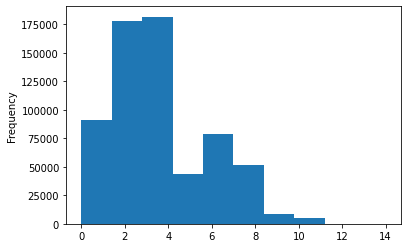

In [76]:
base_df['QT_SEMESTRE_CONCLUIDO'].plot.hist()

### VL_SEMESTRE_SEM_DESCONTO *
tuition_full = numeric values
NAs = 0

Aparentemente alguns outliers (valores próximos de 100.000 por semestre, provavelmente dá para usar o valor com desconto para substituir)

In [64]:
base_df['VL_SEMESTRE_SEM_DESCONTO'].value_counts()

10590.06    12739
7172.45     11415
7521.75     11237
6918.00      4479
9337.56      4256
            ...  
4960.32         1
5159.22         1
4829.00         1
5022.18         1
8192.00         1
Name: VL_SEMESTRE_SEM_DESCONTO, Length: 80878, dtype: int64

In [66]:
sum(pd.isnull(base_df['VL_SEMESTRE_SEM_DESCONTO']))

0

In [77]:
base_df['VL_SEMESTRE_SEM_DESCONTO'].describe()

count    637822.000000
mean       7136.078465
std        4627.849925
min         600.000000
25%        4890.000000
50%        6324.360000
75%        7800.000000
max       99999.240000
Name: VL_SEMESTRE_SEM_DESCONTO, dtype: float64

In [ ]:
base_df.query('VL_SEMESTRE_SEM_DESCONTO > 90000')

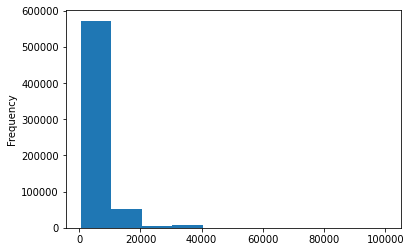

In [88]:
base_df['VL_SEMESTRE_SEM_DESCONTO'].plot.hist()

### VL_SEMESTRE_ATUAL
tuition_current = numeric values
NAs = 0

Valores altos, acima de 25k por semestre. Aparentemente os valores estão corretos (comparando valor semestre, valor do semestre com desconto, valor valor financiado, etc.)

In [ ]:
base_df['VL_SEMESTRE_ATUAL'].value_counts()

10590.06    12739
7172.45     11415
7521.75     11237
6918.00      4479
9337.56      4256
            ...  
4960.32         1
5159.22         1
4829.00         1
5022.18         1
8192.00         1
Name: VL_SEMESTRE_SEM_DESCONTO, Length: 80878, dtype: int64

In [67]:
sum(pd.isnull(base_df['VL_SEMESTRE_ATUAL']))

0

In [ ]:
base_df['VL_SEMESTRE_ATUAL'].describe()

In [ ]:
base_df.query('VL_SEMESTRE_ATUAL > 30000')

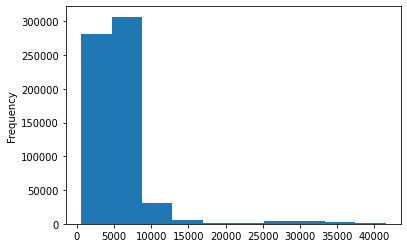

In [87]:
base_df['VL_SEMESTRE_ATUAL'].plot.hist()

### VL_FINANCIADO_SEMESTRE **
loan_value_sem = numeric values
NAs = 0

Revisar valores pelo Excel. 

In [ ]:
base_df['VL_FINANCIADO_SEMESTRE'].value_counts()

In [ ]:
sum(pd.isnull(base_df['VL_FINANCIADO_SEMESTRE']))

In [ ]:
base_df['VL_FINANCIADO_SEMESTRE'].describe()

In [ ]:
base_df['VL_FINANCIADO_SEMESTRE'].plot.hist()

### fase_contrato
phase = amortization, utilization, grace period, liquidation
NAs = 0


In [69]:
base_df['fase_contrato'].value_counts()

Amortizacao    452885
Utilizacao     103915
Carencia        79654
Liquidacao       1368
Name: fase_contrato, dtype: int64

In [70]:
sum(pd.isnull(base_df['fase_contrato']))

0

### vl_divida
total_debt = numeric values
NAs = 0


In [71]:
base_df['vl_divida'].value_counts()

0.00         1358
66557.24       47
2963.77        45
532079.37      32
2853.57        32
             ... 
21533.75        1
20759.97        1
46528.55        1
25459.74        1
80963.89        1
Name: vl_divida, Length: 605984, dtype: int64

In [73]:
sum(pd.isnull(base_df['vl_divida']))

0

In [100]:
base_df['vl_divida'].describe()

count    637822.000000
mean      50219.897849
std       51960.990018
min           0.000000
25%       22453.375000
50%       39904.855000
75%       62050.492500
max      635552.520000
Name: vl_divida, dtype: float64

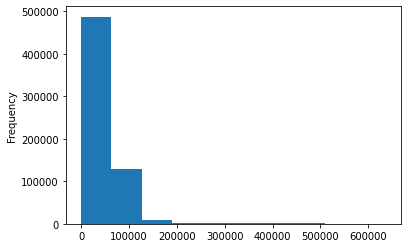

In [101]:
base_df['vl_divida'].plot.hist()

## Bruno

DS_OCUPACAO
VL_RENDA_FAMILIAR_BRUTA_MENSAL
NO_MUNICIPIO
DS_RACA_COR
NU_ANO_CONCLUSAO_ENSINO_MEDIO
SG_UF_CURSO
QT_SEMESTRES_CURSO
QT_SEMESTRE_FINANCIAMENTO
VL_SEMESTRE_COM_DESCONTO
NU_PERCENT_SOLICITADO_FINANC
VL_FINANC_RECURSO_ALUNO
nu_dias_atraso
ANO_NASC